In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
df = pd.read_csv(r"carbon_dot_ml_data - Data.csv")

df.head(5)

,Carbon Dot,Synthesis Label,6M Sulfuric Acid (mL),Urea (grams),Citric Acid (grams),Positive or Negative at 365 nm excitation,Inhibition_(%),Conductivity,OH Presence,NH Presence,SH Presence,C=O Presence,CN Presence,MaxValue (Fluorecence Ex @ 400 nm),Emission Wavelength (Ex @ 400 nm)
0,syn_1,B1-1,0.423,0.1271,0.1274,NaN,-6.85976,1768.0,1,1,0,1,1,0.037919,403.1
1,syn_2,B1-2,1.577,0.1272,0.1274,NaN,-15.09150,3917.0,1,1,1,1,1,0.009542,483.1
2,syn_3,B1-3,0.423,0.4728,0.1271,Both,-14.02440,667.0,1,1,1,1,1,0.028918,506.7
3,syn_4,B1-4,1.577,0.4732,0.1273,NaN,-8.84146,2645.0,1,1,0,1,1,0.012842,401.1
4,syn_5,B1-5,0.423,0.1273,0.4734,NaN,-17.98780,971.0,1,1,1,1,1,0.010605,401.1


In [183]:
# Splitting into train and validation data

df_train = df.sample(frac =0.8, random_state = 1)

df_valid = df.drop(df_train.index)

df_train

,Carbon Dot,Synthesis Label,6M Sulfuric Acid (mL),Urea (grams),Citric Acid (grams),Positive or Negative at 365 nm excitation,Inhibition_(%),Conductivity,OH Presence,NH Presence,SH Presence,C=O Presence,CN Presence,MaxValue (Fluorecence Ex @ 400 nm),Emission Wavelength (Ex @ 400 nm)
17,syn_18,B2-7,1.000,0.3001,0.3000,NaN,-5.640240,1420.00,1,1,1,1,1,0.006065,403.7
21,syn_22,N,0.000,0.5000,0.0000,NaN,57.317070,30.00,1,1,0,1,1,0.068706,495.5
10,syn_11,B1-11,1.000,0.3007,0.3007,NaN,12.500000,1663.00,1,1,1,1,1,0.006207,401.8
19,syn_20,B2-9,1.000,0.3004,0.2999,NaN,8.079268,1582.75,1,1,1,1,1,0.006863,404.4
14,syn_15,B2-4,1.000,0.6001,0.3000,Both,7.317073,660.00,1,1,0,1,1,0.017681,521.0
20,syn_21,NS,2.000,0.5000,0.0000,Both,17.378050,3781.00,1,1,1,1,1,0.481566,403.1
26,syn_27,ML-5,0.000,0.6002,0.6004,Both,8.231707,196.00,1,1,0,1,1,0.002463,636.5
3,syn_4,B1-4,1.577,0.4732,0.1273,NaN,-8.841460,2645.00,1,1,0,1,1,0.012842,401.1
24,syn_25,ML-3,2.500,0.0000,0.0000,NaN,-16.006100,3935.00,1,0,1,0,0,0.347000,403.1
22,syn_23,ML-1,0.000,0.0000,0.5004,NaN,18.902440,456.00,1,0,0,1,0,0.782150,403.1


In [184]:
x_train = df_train[['Urea (grams)', '6M Sulfuric Acid (mL)']]
x_valid = df_valid[['Urea (grams)', '6M Sulfuric Acid (mL)']]
y_train = df_train['Emission Wavelength (Ex @ 400 nm)']
y_valid = df_valid['Emission Wavelength (Ex @ 400 nm)']

In [185]:
x_train.shape

(24, 2)

In [186]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [187]:
early_stopping = callbacks.EarlyStopping(
   min_delta = 0.1,
   patience =20,
  restore_best_weights=True,
)

model = keras.Sequential([
    #layers.BatchNormalization(),
    layers.Dense(128, activation= 'relu', input_shape=[2]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(128, activation = 'relu'), 
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    #layers.Dense(128, activation = 'relu'),
    #layers.BatchNormalization(),
    #layers.Dense(64, activation = 'relu'),
    layers.Dense(1),
])

In [188]:
model.compile(
    optimizer = 'adam',
    loss = 'mae'
)

In [189]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    batch_size=12,
    epochs=800,
    callbacks = [early_stopping]
)

Train on 24 samples, validate on 6 samples
Epoch 1/800
24/24 [==============================] - 2s 71ms/sample - loss: 439.5181 - val_loss: 425.4964
Epoch 2/800
24/24 [==============================] - 0s 651us/sample - loss: 439.4901 - val_loss: 425.4794
Epoch 3/800
24/24 [==============================] - 0s 196us/sample - loss: 439.4612 - val_loss: 425.4674
Epoch 4/800
24/24 [==============================] - 0s 0s/sample - loss: 439.4313 - val_loss: 425.4429
Epoch 5/800
24/24 [==============================] - 0s 487us/sample - loss: 439.4003 - val_loss: 425.4184
Epoch 6/800
24/24 [==============================] - 0s 22us/sample - loss: 439.3681 - val_loss: 425.3872
Epoch 7/800
24/24 [==============================] - 0s 0s/sample - loss: 439.3346 - val_loss: 425.3596
Epoch 8/800
24/24 [==============================] - 0s 694us/sample - loss: 439.2999 - val_loss: 425.3297
Epoch 9/800
24/24 [==============================] - 0s 0s/sample - loss: 439.2639 - val_loss: 425.3092
Epoch

Minimum validation loss: 3.218592405319214


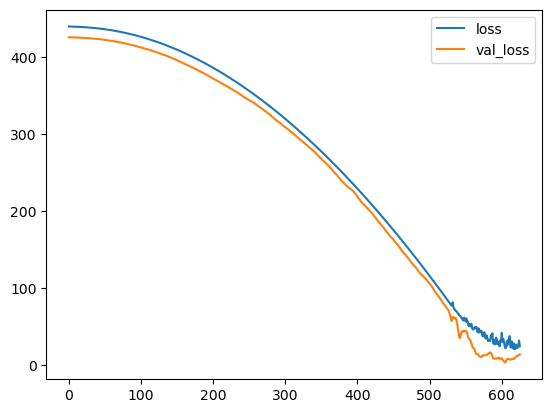

In [190]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

In [192]:
history_df.columns

Index(['loss', 'val_loss'], dtype='object')

In [194]:
print("Minimum training loss: {}".format(history_df['loss'].min()))

Minimum training loss: 20.33275604248047


In [195]:
import os

In [196]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [199]:
y_pred = model.predict(x_valid)

In [205]:
len(y_pred)

6

In [208]:
model.evaluate(x_valid, y_valid, batch_size = 12)

6/6 [==============================] - 0s 333us/sample - loss: 3.2186


3.218592405319214

In [209]:
history_df

,loss,val_loss
0,439.518112,425.496429
1,439.490112,425.479401
2,439.461197,425.467438
3,439.431274,425.442902
4,439.400253,425.418365
...,...,...
621,21.701346,11.563507
622,22.746847,11.995239
623,25.595397,12.558269
624,31.697265,12.898056


In [210]:
history_df['val_loss'].idxmin()

605

In [212]:
history_df.iloc[605]

loss        21.775920
val_loss     3.218592
Name: 605, dtype: float64